In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


def find_nearest_idx(
    arr1: np.ndarray,
    arr2: np.ndarray,
    val1: float,
    val2: float,
) -> int:
    """Find first nearest index for a given tolerance for two arrays and 2 values

    :param arr1: first array
    :param arr2: second arrat
    :param val1: value to find in first array
    :param val2: value to find in second array
    :return: index as int
    """
    return (np.abs(arr1 - val1) + np.abs(arr2 - val2)).argmin()

In [5]:
ds = xr.open_dataset("/ec/fws2/sb/work/rd/daep/ifzv/data/osm/outdata/20200101/control/o_gg0000.nc")
ds

<xarray.Dataset> Size: 17GB
Dimensions:     (x: 120459, nlevs: 4, tile: 10, vtype: 2, time: 745, nlevsn: 5)
Coordinates:
    lat         (x) float64 964kB ...
    lon         (x) float64 964kB ...
  * nlevs       (nlevs) int32 16B 1 2 3 4
  * tile        (tile) int32 40B 1 2 3 4 5 6 7 8 9 10
  * vtype       (vtype) int32 8B 1 2
  * time        (time) datetime64[ns] 6kB 2020-01-01 ... 2020-02-01
  * nlevsn      (nlevsn) int32 20B 1 2 3 4 5
Dimensions without coordinates: x
Data variables: (12/22)
    timestp     (time) int32 3kB ...
    AvgSurfT    (time, x) float32 359MB ...
    CanopInt    (time, x) float32 359MB ...
    SWE         (time, x) float32 359MB ...
    SnowT       (time, x) float32 359MB ...
    SAlbedo     (time, x) float32 359MB ...
    ...          ...
    SoilTemp    (time, nlevs, x) float32 1GB ...
    icetemp     (time, nlevs, x) float32 1GB ...
    SnowTML     (time, nlevsn, x) float32 2GB ...
    SWEML       (time, nlevsn, x) float32 2GB ...
    snowdensML  (time, nlevsn, x) float32 2GB ...
    slwML       (time, nlevsn, x) float32 2GB ...
Attributes:
    modelID:             49r1
    versionID:           
    start_day:           20200101
    start_hour:          0
    SurfSgn_convention:  Mathematical

In [11]:
ds.time.values[[0,1,2,-3,-2,-1]]

array(['2020-01-01T00:00:00.000000000', '2020-01-01T01:00:00.000000000',
       '2020-01-01T02:00:00.000000000', '2020-01-31T22:00:00.000000000',
       '2020-01-31T23:00:00.000000000', '2020-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

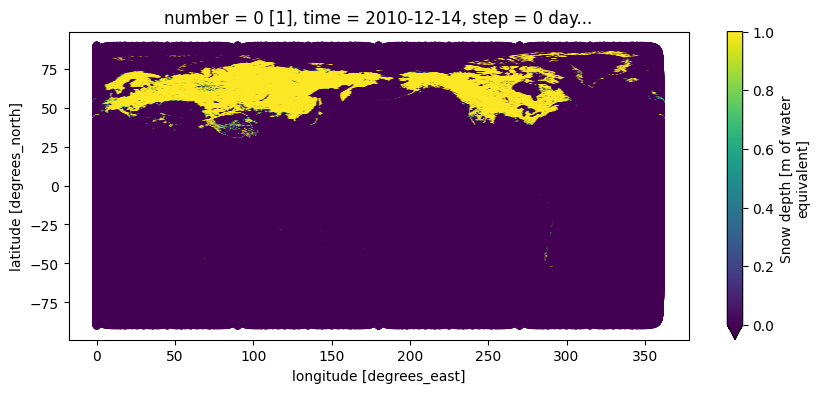

In [2]:
xr.open_dataset("/scratch/daep/20101214.grib").plot.scatter(x="longitude", y="latitude", hue="sd", edgecolors="none", figsize=(10,4), vmin=0, vmax=1)
plt.show()

In [37]:
#ds = xr.open_zarr("/hpcperm/daep/ec_land_training_db/ecland_i8ki_o200_2010_2022_6h.zarr/")
ds = xr.open_zarr("/scratch/daep/ec_training_db_out_O400/ecland_i6aj_2017_2022_6hv3.zarr/")
ds

<xarray.Dataset> Size: 194GB
Dimensions:                     (x: 164695, clim_variable: 23, time: 8640,
                                 variable: 34)
Coordinates:
  * clim_variable               (clim_variable) object 184B 'clim_cell_area' ...
    lat                         (x) float32 659kB dask.array<chunksize=(164695,), meta=np.ndarray>
    lon                         (x) float32 659kB dask.array<chunksize=(164695,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 69kB 2017-01-01 ... 202...
  * variable                    (variable) object 272B 'met_ctpf' ... 'log10_sd'
  * x                           (x) int32 659kB 2465 2764 2898 ... 604077 604078
Data variables: (12/18)
    clim_data                   (x, clim_variable) float32 15MB dask.array<chunksize=(164695, 23), meta=np.ndarray>
    clim_maxs                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_means                  (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_mins                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_stdevs                 (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    data                        (time, x, variable) float32 194GB dask.array<chunksize=(4, 164695, 34), meta=np.ndarray>
    ...                          ...
    global_data_1stdiff_means   (x, variable) float32 22MB dask.array<chunksize=(164695, 34), meta=np.ndarray>
    global_data_1stdiff_stdevs  (x, variable) float32 22MB dask.array<chunksize=(164695, 34), meta=np.ndarray>
    global_data_maxs            (x, variable) float32 22MB dask.array<chunksize=(20587, 9), meta=np.ndarray>
    global_data_means           (x, variable) float32 22MB dask.array<chunksize=(20587, 9), meta=np.ndarray>
    global_data_mins            (x, variable) float32 22MB dask.array<chunksize=(20587, 9), meta=np.ndarray>
    global_data_stdevs          (x, variable) float32 22MB dask.array<chunksize=(20587, 9), meta=np.ndarray>

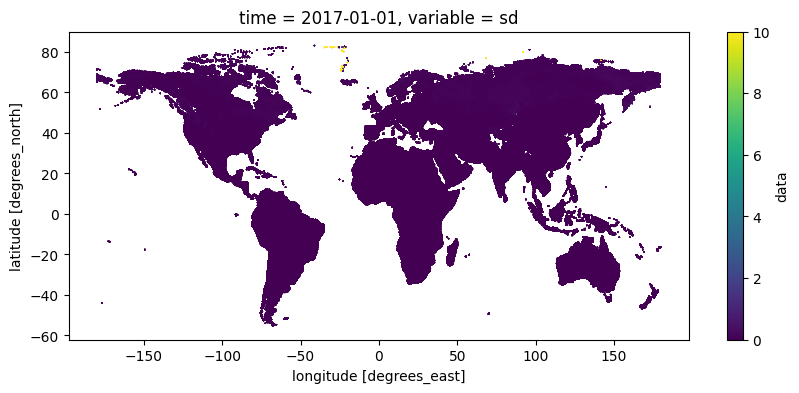

In [38]:
ds.sel(variable="sd").isel(time=0).plot.scatter(x="lon", y="lat", hue="data", edgecolors="none", s=1, figsize=(10,4))
plt.show()

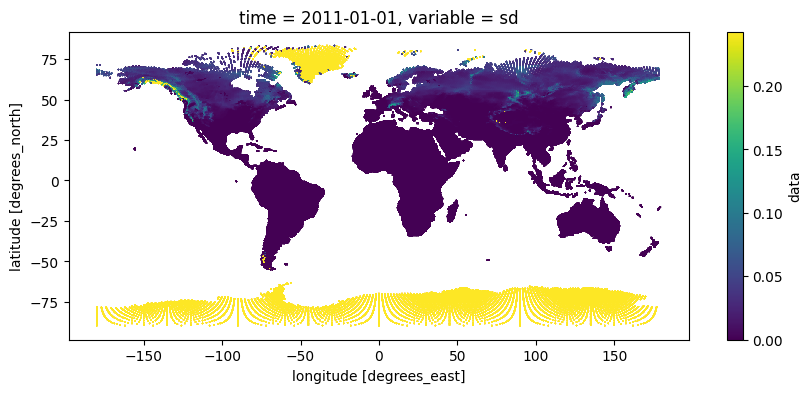

In [5]:
np.log10(ds.sel(variable="sd").isel(time=365*4).clip(0,0.75)+1).plot.scatter(x="lon", y="lat", hue="data", edgecolors="none", s=1, figsize=(10,4))
plt.show()

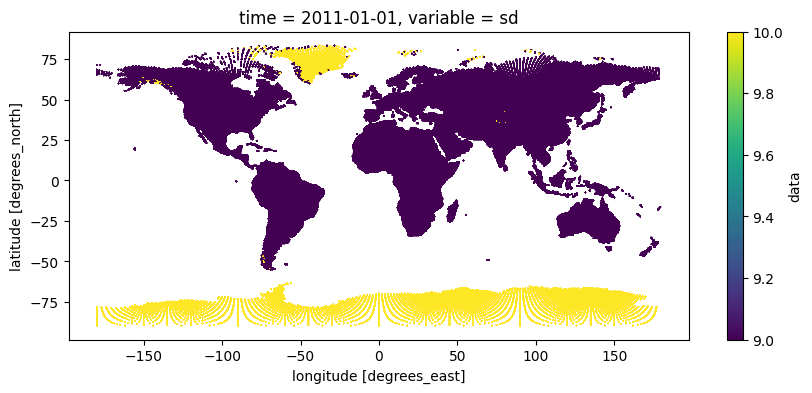

In [6]:
ds.sel(variable="sd").isel(time=365*4).clip(9,10).plot.scatter(x="lon", y="lat", hue="data", edgecolors="none", s=1, figsize=(10,4))
plt.show()

In [7]:
ds

<xarray.Dataset> Size: 119GB
Dimensions:                     (x: 47892, clim_variable: 23, time: 18868,
                                 variable: 33)
Coordinates:
  * clim_variable               (clim_variable) object 184B 'clim_cell_area' ...
    lat                         (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
    lon                         (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 151kB 2010-01-01 ... 20...
  * variable                    (variable) object 264B 'met_ctpf' ... 'es'
  * x                           (x) int32 192kB 713 714 715 ... 167199 167200
Data variables: (12/18)
    clim_data                   (x, clim_variable) float32 4MB dask.array<chunksize=(47892, 23), meta=np.ndarray>
    clim_maxs                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_means                  (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_mins                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_stdevs                 (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    data                        (time, x, variable) float32 119GB dask.array<chunksize=(4, 47892, 33), meta=np.ndarray>
    ...                          ...
    global_data_1stdiff_means   (x, variable) float32 6MB dask.array<chunksize=(47892, 33), meta=np.ndarray>
    global_data_1stdiff_stdevs  (x, variable) float32 6MB dask.array<chunksize=(47892, 33), meta=np.ndarray>
    global_data_maxs            (x, variable) float32 6MB dask.array<chunksize=(11973, 9), meta=np.ndarray>
    global_data_means           (x, variable) float32 6MB dask.array<chunksize=(11973, 9), meta=np.ndarray>
    global_data_mins            (x, variable) float32 6MB dask.array<chunksize=(11973, 9), meta=np.ndarray>
    global_data_stdevs          (x, variable) float32 6MB dask.array<chunksize=(11973, 9), meta=np.ndarray>

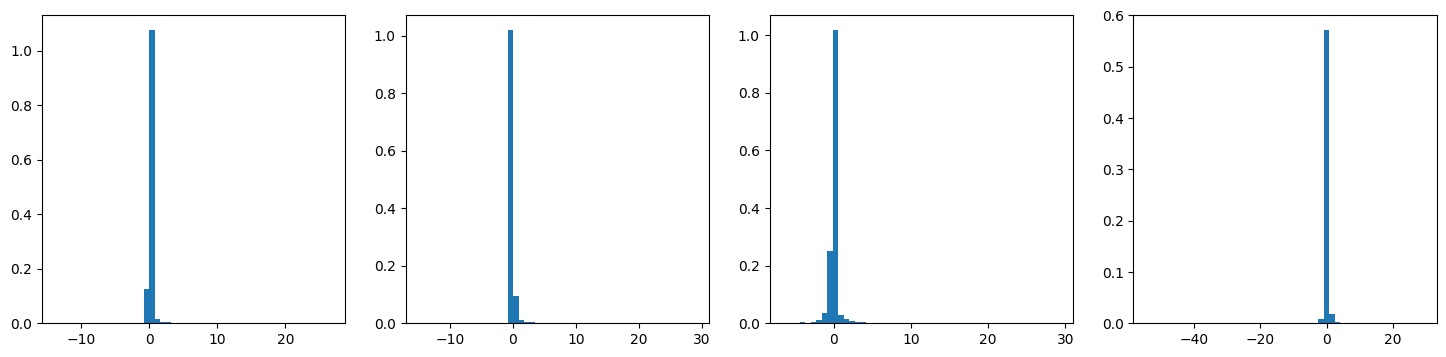

In [98]:
#ds = xr.open_zarr("/hpcperm/daep/ec_land_training_db/ecland_i8ki_o200_2010_2022_6h.zarr/")
ds = xr.open_zarr("/scratch/daep/ec_training_db_out_O400/ecland_i6aj_2017_2022_6hv3.zarr/")

sd = ds.sel(variable="sd").isel(time=365*4).data  # .values
rsn = ds.sel(variable="rsn").isel(time=365*4).data  # .values
snowc = ds.sel(variable="snowc").isel(time=365*4).data.values
lats = ds.lat.values
lons = ds.lon.values

sd1 = ds.sel(variable="sd").isel(time=365*4).data.values
sd2 = ds.sel(variable="sd").isel(time=365*4+1).data.values
sd_diffvar = (ds.sel(variable="sd").isel(time=365*4+1).data_1stdiff_stdevs.values)#**2
sd_mu = (ds.sel(variable="sd").isel(time=365*4+1).data_stdevs.values)#**2
sd_max = (ds.sel(variable="sd").isel(time=365*4+1).global_data_maxs.values)#**2
sd_std = (ds.sel(variable="sd").isel(time=365*4+1).data_means.values)#**2

sdl1 = ds.sel(variable="log10_sd").isel(time=365*4).data.values
sdl2 = ds.sel(variable="log10_sd").isel(time=365*4+1).data.values
sdl_diffvar = (ds.sel(variable="log10_sd").isel(time=365*4+1).data_1stdiff_stdevs.values)#**2
sdl_mu = (ds.sel(variable="log10_sd").isel(time=365*4+1).data_stdevs.values)#**2
sdl_std = (ds.sel(variable="log10_sd").isel(time=365*4+1).data_means.values)#**2

swvl1_1 = ds.sel(variable="swvl1").isel(time=365*4).data.values
swvl1_2 = ds.sel(variable="swvl1").isel(time=365*4+1).data.values
swvl_diffvar = (ds.sel(variable="swvl1").isel(time=365*4+1).data_1stdiff_stdevs.values)#**2
swvl3_1 = ds.sel(variable="swvl3").isel(time=365*4).data.values
swvl3_2 = ds.sel(variable="swvl3").isel(time=365*4+1).data.values
swvl3_diffvar = (ds.sel(variable="swvl3").isel(time=365*4+1).data_1stdiff_stdevs.values)#**2

sc1 = ds.sel(variable="snowc").isel(time=365*4).data.values
sc2 = ds.sel(variable="snowc").isel(time=365*4+1).data.values
sc_diffvar = (ds.sel(variable="snowc").isel(time=365*4+1).data_1stdiff_stdevs.values)#**2
sc_mu = (ds.sel(variable="snowc").isel(time=365*4+1).data_stdevs.values)#**2
sc_std = (ds.sel(variable="snowc").isel(time=365*4+1).data_means.values)#**2

fig, ax = plt.subplots(ncols=4, figsize=(18,4))
#plt.hist(np.log10(np.clip(sd, 0, 0.75)+1), density=True, bins=50)
ax[0].hist((sd2-sd1)/sd_diffvar, density=True, bins=50)
#ax[1].hist((sc2-sc1)/sc_diffvar, density=True, bins=50)
ax[1].hist((sdl2-sdl1)/sdl_diffvar, density=True, bins=50)
ax[2].hist((swvl1_2-swvl1_1)/swvl_diffvar, density=True, bins=50)
ax[3].hist((swvl3_2-swvl3_1)/swvl3_diffvar, density=True, bins=50)
plt.show()

In [9]:
# tmp3 = np.clip(tmp1, 0, 0.25)

# plt.scatter(x=lons, y=lats, c=tmp3, s=1)
# plt.colorbar()
# plt.show()

In [99]:
sd_max

array([0.5018883 , 0.19532299, 0.12141228, ..., 0.03625679, 0.07430553,
       0.05136395], dtype=float32)

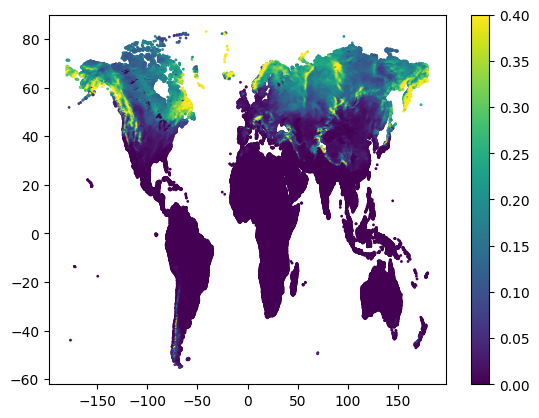

In [113]:
#plt.scatter(x=lons[sd<10], y=lats[sd<10], c=sd.values[sd<10], s=1)
plt.scatter(x=lons[sd_max<10], y=lats[sd_max<10], c=np.log(sd_max[sd_max<10]+1), s=1, vmax=0.4)
plt.colorbar()
plt.show()

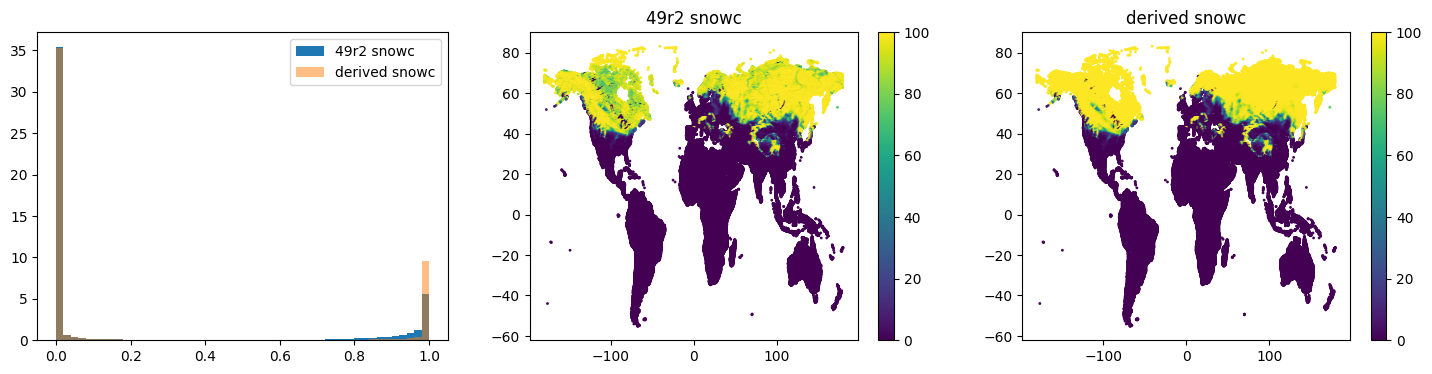

In [127]:
fig,ax = plt.subplots(ncols=3, figsize=(18,4))

ax[0].hist(snowc/100, density=True, bins=50, label="49r2 snowc")
#ax[0].hist(np.tanh(1000*sd/(2.5*0.01*(rsn/100))), density=True, bins=50, alpha=0.5)
#ax[0].hist(np.tanh(1000*sd/(2.5*0.1*(rsn/100)**1.6)), density=True, bins=50, alpha=0.5, label="eq formula")

tmp1 = (1000*sd) / rsn  #np.clip(rsn, 100, 400)  # rsn
#tmp2 = np.max(np.array([np.ones_like(rsn)*100, np.min(np.array([400*np.ones_like(rsn), rsn]), axis=0)]), axis=0)
#snow_cover = np.max(np.array([np.zeros_like(rsn), np.min(np.array([np.ones_like(rsn), np.tanh((4000*tmp1)/tmp2)]), axis=0)]), axis=0)
tmp2 = np.clip(rsn, 100, 400)
snow_cover = np.clip(np.tanh((4000*tmp1)/tmp2), 0, 1)
# snow_cover[snow_cover > 0.99] = 1.0
snow_cover = snow_cover.where(snow_cover<0.99, 1).values
ax[0].hist(snow_cover, density=True, bins=50, alpha=0.5, label="derived snowc")
# assuming density of water = 1000 kg m-3

#sc2 = np.clip((1000*sd/rsn)/0.1, 0, 1)
#ax[0].hist(sc2, density=True, bins=50, alpha=0.5, label="sc2")

c1 = ax[1].scatter(x=lons, y=lats, c=snowc, s=1)
plt.colorbar(c1)
ax[1].set_title("49r2 snowc")
c2 = ax[2].scatter(x=lons, y=lats, c=snow_cover*100, s=1)
#c2 = ax[2].scatter(x=lons, y=lats, c=np.tanh(1000*sd/(2.5*0.1*(rsn/100))), s=1)
plt.colorbar(c2)
ax[2].set_title("derived snowc")
ax[0].legend()

plt.show()

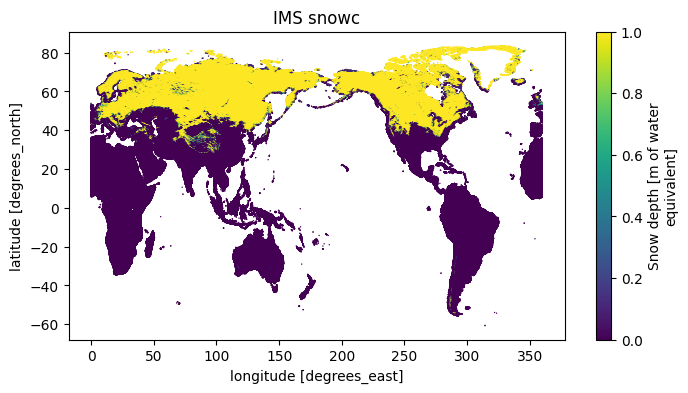

In [16]:
ds_ims = xr.open_dataset("/scratch/daep/20101214.grib")
ds_ims["sd"][ds_ims["sd"]<0] = np.nan
ds_ims.plot.scatter(x="longitude", y="latitude", hue="sd", edgecolors="none", figsize=(8,4), vmin=0, s=1)
plt.title("IMS snowc")
plt.show()

In [17]:
tmp2

<xarray.DataArray 'data' (x: 47892)> Size: 192kB
array([300.     , 400.     , 228.07811, ..., 300.     , 300.     ,
       300.     ], dtype=float32)
Coordinates:
    lat       (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
    lon       (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
    time      datetime64[ns] 8B 2011-01-01
    variable  <U3 12B 'rsn'
  * x         (x) int32 192kB 713 714 715 784 ... 167197 167198 167199 167200

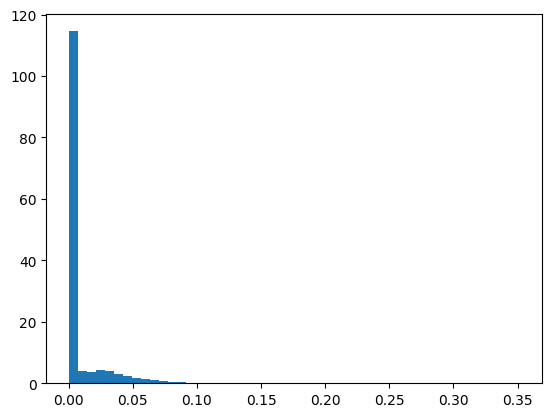

In [120]:
#plt.hist(np.clip(sd, 0, 0.5), density=True, bins=50)
#plt.hist(np.log10(sd+1), density=True, bins=50)

#plt.hist(, density=True, bins=50)
plt.hist(np.log10(sd.values[sd<10]+1), density=True, bins=50)
plt.show()

In [49]:
sd_std, sd_mu

(array(0.01255586, dtype=float32), array(0.1277878, dtype=float32))

In [ ]:
plt.hist(np.tanh(sd+1), density=True, bins=50)
plt.show()

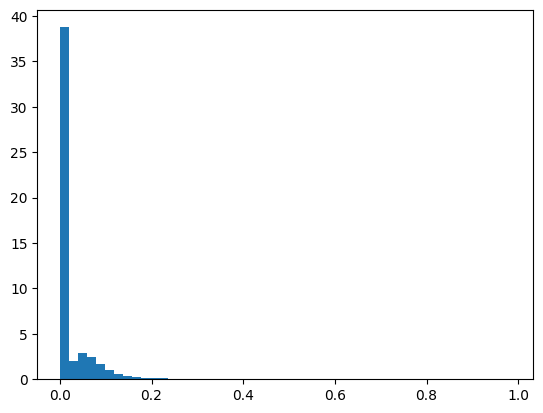

In [21]:
sd2 = sd[sd<1]
#plt.hist(np.log10(sd2+1), density=True, bins=50)
plt.hist(sd2, density=True, bins=50)
plt.show()

In [20]:
np.max(sd2)

0.98377514

In [4]:
xr.open_dataset("/home/rdx/data/climate/climate.v021/1279_4/cvh", engine="cfgrib")

Can't create file '/home/rdx/data/climate/climate.v021/1279_4/cvh.9093e.idx'
Traceback (most recent call last):
  File "/usr/local/apps/python3/3.11.8-01/lib/python3.11/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/usr/local/apps/python3/3.11.8-01/lib/python3.11/contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "/usr/local/apps/python3/3.11.8-01/lib/python3.11/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
PermissionError: [Errno 13] Permission denied: '/home/rdx/data/climate/climate.v021/1279_4/cvh.9093e.idx'
Can't read index file '/home/rdx/data/climate/climate.v021/1279_4/cvh.9093e.idx'
Traceback (most recent call last):
  File "/usr/local/apps/python3/3.11.8-01/lib/python3.11/site-packages

<xarray.Dataset> Size: 132MB
Dimensions:     (values: 6599680)
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    latitude    (values) float64 53MB ...
    longitude   (values) float64 53MB ...
    valid_time  datetime64[ns] 8B ...
Dimensions without coordinates: values
Data variables:
    cvh         (values) float32 26MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-07-23T10:27 GRIB to CDM+CF via cfgrib-0.9.1...

In [106]:
ZARR_NAME='/ec/res4/scratch/daep/ec_training_db_out_O400/ecland_i6aj_2017_2022_6hv3.zarr'
ds = xr.open_zarr(ZARR_NAME)
ds

<xarray.Dataset> Size: 3GB
Dimensions:   (time: 124, x: 164695, variable: 36)
Coordinates:
    lat       (x) float32 659kB dask.array<chunksize=(164695,), meta=np.ndarray>
    lon       (x) float32 659kB dask.array<chunksize=(164695,), meta=np.ndarray>
  * time      (time) datetime64[ns] 992B 2017-01-01 ... 2017-01-31T18:00:00
  * variable  (variable) object 288B 'met_ctpf' 'met_lwdown' ... 'es' 'log_sd'
  * x         (x) int32 659kB 2465 2764 2898 2899 ... 603443 604077 604078
Data variables:
    data      (time, x, variable) float32 3GB dask.array<chunksize=(4, 164695, 36), meta=np.ndarray>

In [107]:
ds.lat.values

array([ 83.08548 ,  82.635765,  82.41091 , ..., -54.978123, -55.202984,
       -55.202984], dtype=float32)

In [160]:
# Find x index for gridcell closest to desired lat/lon
lat, lon = 51, 0
x_idx = find_nearest_idx(ds.lat.values, ds.lon.values, lat, lon)
print(x_idx)
ds_point = (ds
 .data
 .isel(x=x_idx)
 .sel(time="2017-01").to_dataset()
).compute()

29146


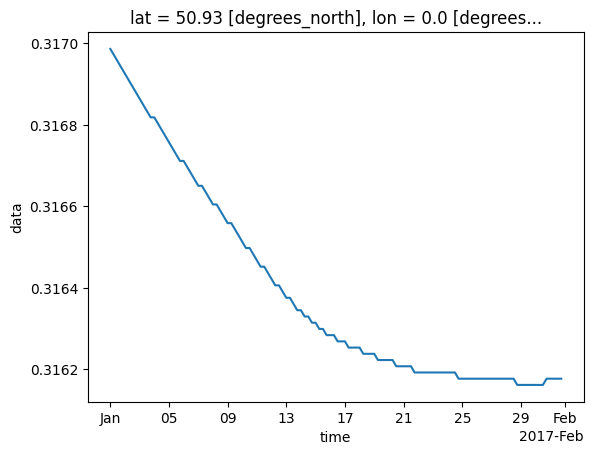

In [194]:
ds_point.sel(variable="swvl").data.plot()

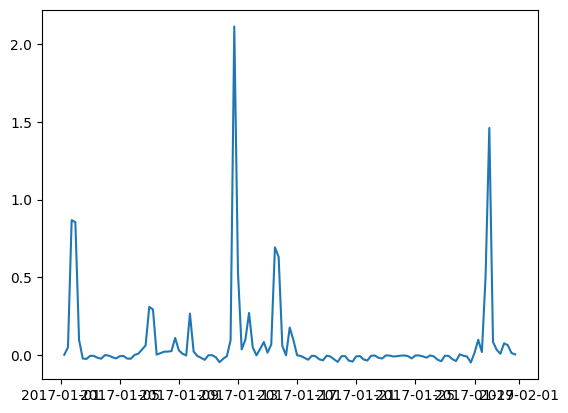

In [201]:
plt.plot(ds_point.time.values[1:], sw_inc/6, label="swvl_sum")

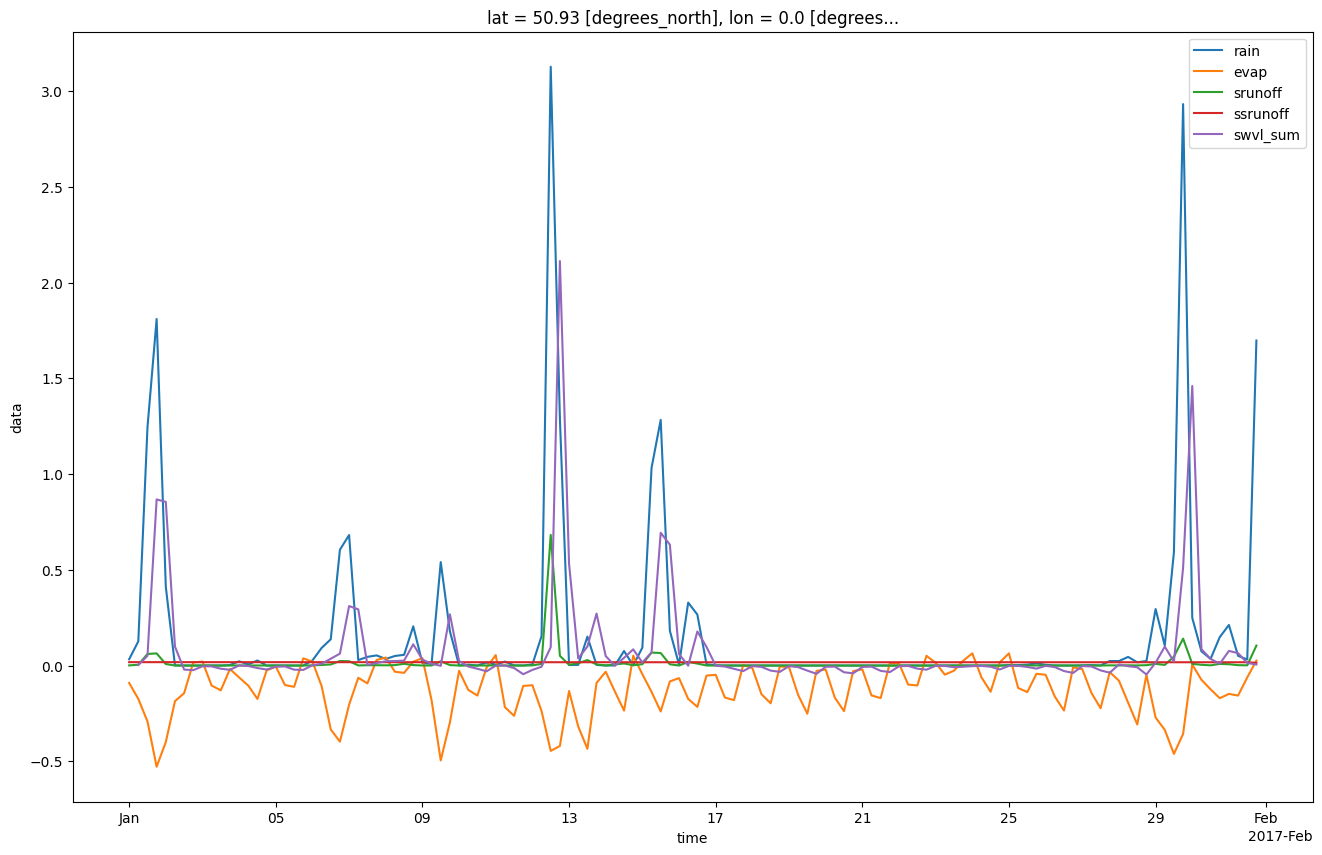

In [200]:
plt.figure(figsize=(16,10))
(ds_point.sel(variable="met_rainf")*1000*6).data.plot(label="rain")
(ds_point.sel(variable="e")*3600*1000*6).data.plot(label="evap")
#ds_point.sel(variable="swvl1").data.plot()
#ds_point.sel(variable="sro").data.plot()
#((-ds_point.sel(variable="ssro")-ds_point.sel(variable="sro"))*3600).data.plot(label="runoff")
((ds_point.sel(variable="sro"))*3600*1000*6).data.plot(label="srunoff")
((ds_point.sel(variable="ssro"))*3600*1000*6).data.plot(label="ssrunoff")
swvl1_inc = np.diff(ds_point.sel(variable="swvl1").data.values)*70
swvl2_inc = np.diff(ds_point.sel(variable="swvl2").data.values)*210
swvl3_inc = np.diff(ds_point.sel(variable="swvl3").data.values)*720
swvl4_inc = np.diff(ds_point.sel(variable="swvl4").data.values)*1890
sw_inc = np.sum([swvl1_inc, swvl2_inc, swvl3_inc, swvl4_inc], axis=0)
plt.plot(ds_point.time.values[1:], sw_inc/6, label="swvl_sum")

plt.legend()

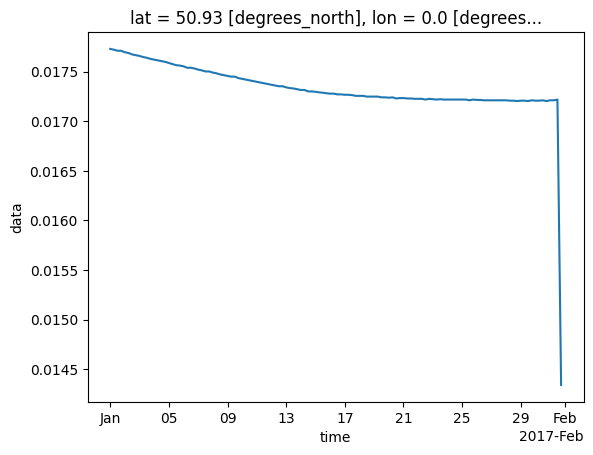

In [213]:
((ds_point.sel(variable="ssro"))*3600*1000*6).data.plot(label="ssrunoff")

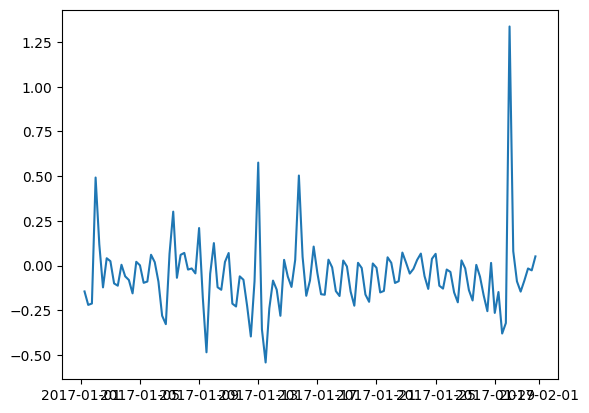

In [214]:
water_bal = -sw_inc/6 + (ds_point.sel(variable="met_rainf")*1000*6).data.values[:-1] + (ds_point.sel(variable="e")*3600*1000*6).data.values[1:] - ((ds_point.sel(variable="sro"))*3600*1000*6).data.values[:-1]
plt.plot(ds_point.time.values[1:], water_bal, label="swvl_sum")

In [215]:
np.sum(water_bal)

-6.7813954

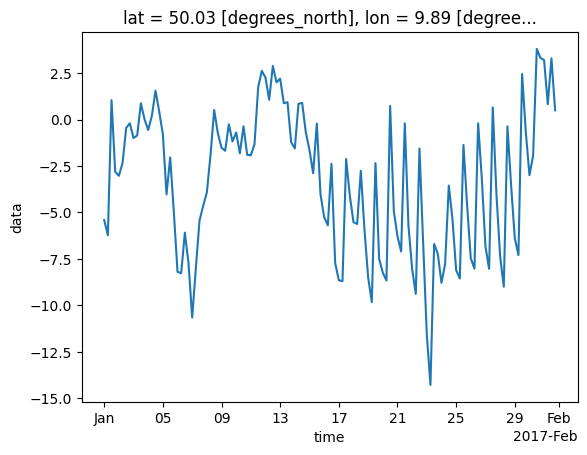

In [144]:
(ds_point.sel(variable="t2m")-273).data.plot()

In [48]:
ds_point

<xarray.Dataset> Size: 908B
Dimensions:   (time: 4, variable: 36)
Coordinates:
    lat       float32 4B 50.03
    lon       float32 4B 9.89
  * time      (time) datetime64[ns] 32B 2017-01-03 ... 2017-01-03T18:00:00
  * variable  (variable) object 288B 'met_ctpf' 'met_lwdown' ... 'es' 'log_sd'
    x         int32 4B 65865
Data variables:
    data      (time, variable) float32 576B 0.0 291.8 ... -4.31e-09 -6.014

In [97]:
#ds = xr.open_zarr(f"/ec/res4/scratch/daep/ec_training_db_out_O400/ecland_era5forcing_20170200.zarr/")
ds = xr.open_zarr("/ec/res4/scratch/daep/ec_training_db_out_O400/i6aj_20170101.zarr/")
lat, lon = 50., 10.0
x_idx = find_nearest_idx(ds.lat.values, ds.lon.values, lat, lon)
print(x_idx)
ds_point = (ds
 .isel(x=x_idx)
 .sel(time="2017-01")
).compute()

34754


In [98]:
ds

<xarray.Dataset> Size: 27GB
Dimensions:          (time: 744, x: 187070)
Coordinates:
    lat              (x) float64 1MB dask.array<chunksize=(187070,), meta=np.ndarray>
    lon              (x) float64 1MB dask.array<chunksize=(187070,), meta=np.ndarray>
  * time             (time) datetime64[ns] 6kB 2017-01-01 ... 2017-01-31T23:0...
  * x                (x) int32 748kB 2192 2193 2194 ... 654398 654399 654400
Data variables: (12/71)
    aco2gpp          (time, x) float32 557MB dask.array<chunksize=(744, 187070), meta=np.ndarray>
    asn              (time, x) float32 557MB dask.array<chunksize=(744, 187070), meta=np.ndarray>
    clim_CLAKE       (x) float32 748kB dask.array<chunksize=(187070,), meta=np.ndarray>
    clim_Ctype       (x) float32 748kB dask.array<chunksize=(187070,), meta=np.ndarray>
    clim_LDEPTH      (x) float32 748kB dask.array<chunksize=(187070,), meta=np.ndarray>
    clim_cell_area   (x) float32 748kB dask.array<chunksize=(187070,), meta=np.ndarray>
    ...               ...
    tsn              (time, x) float32 557MB dask.array<chunksize=(744, 187070), meta=np.ndarray>
    tsn_l1           (time, x) float32 557MB dask.array<chunksize=(744, 187070), meta=np.ndarray>
    tsn_l2           (time, x) float32 557MB dask.array<chunksize=(744, 187070), meta=np.ndarray>
    tsn_l3           (time, x) float32 557MB dask.array<chunksize=(744, 187070), meta=np.ndarray>
    tsn_l4           (time, x) float32 557MB dask.array<chunksize=(744, 187070), meta=np.ndarray>
    tsn_l5           (time, x) float32 557MB dask.array<chunksize=(744, 187070), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2024-07-22T13:35 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [99]:
ds.lon.values

array([-35.45454545, -32.72727273, -30.        , ..., -54.        ,
       -36.        , -18.        ])

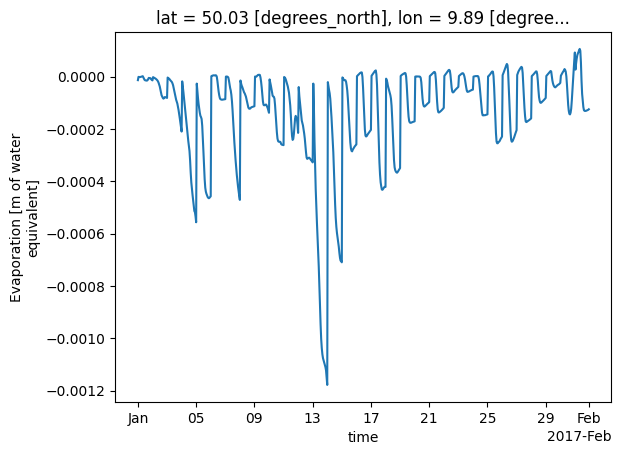

In [104]:
ds_point.e.plot()

In [102]:
ds_point

<xarray.Dataset> Size: 149kB
Dimensions:          (time: 744)
Coordinates:
    lat              float64 8B 50.03
    lon              float64 8B 9.89
  * time             (time) datetime64[ns] 6kB 2017-01-01 ... 2017-01-31T23:0...
    x                int32 4B 65865
Data variables: (12/71)
    aco2gpp          (time) float32 3kB 4.843e-06 0.0 ... 0.0009954 0.0009954
    asn              (time) float32 3kB 0.8241 0.8237 0.8234 ... 0.5303 0.53
    clim_CLAKE       float32 4B 0.001352
    clim_Ctype       float32 4B 3.0
    clim_LDEPTH      float32 4B 4.3
    clim_cell_area   float32 4B 8.832e+08
    ...               ...
    tsn              (time) float32 3kB 270.5 270.4 270.2 ... 273.2 273.2 272.8
    tsn_l1           (time) float32 3kB 270.5 270.4 270.2 ... 273.2 273.2 272.8
    tsn_l2           (time) float32 3kB 270.5 270.4 270.2 ... 273.2 273.2 272.8
    tsn_l3           (time) float32 3kB 270.5 270.4 270.2 ... 273.2 273.2 272.8
    tsn_l4           (time) float32 3kB 270.5 270.4 270.2 ... 273.2 273.2 272.8
    tsn_l5           (time) float32 3kB 270.5 270.4 270.2 ... 273.2 273.2 272.8
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2024-07-22T13:35 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts